### **Bài tập cá nhân môn Xử lý ngôn ngữ tự nhiên**

**Đề bài:**
<br>
Sử dụng NLTK và định nghĩa một văn phạm CFG để xây dựng một parser phân tích cú pháp cho các câu trong một tập ngữ liệu cho trước


### **1. THIẾT LẬP**


In [1]:
# Khai báo thư viện nltk để sử dụng
import nltk 

# Khai báo thêm các thư viện hỗ trợ trực quan hóa ngữ liệu
from IPython.display import display

In [2]:
# Tạo tập ngữ liệu
["Nam đang đọc sách ở thư viện",
"Nam thích đọc sách",
"Nam có nhiều cuốn sách rất hay",
"Nó mới mua hai cuốn sách mới",
"Nam tặng Lan một cuốn sách"]

['Nam đang đọc sách ở thư viện',
 'Nam thích đọc sách',
 'Nam có nhiều cuốn sách rất hay',
 'Nó mới mua hai cuốn sách mới',
 'Nam tặng Lan một cuốn sách']

In [3]:
# Tạo văn phạm CFG xử lý các ngữ liệu
cfg = """
S   -> NP VP

NP  -> PropN
NP  -> N
NP  -> UN N
NP  -> Q NP
NP  -> N AdjP

VP  -> V NP
VP  -> V VP
VP  -> V NP NP
VP  -> V AdvP NP
VP  -> V NP AdjP
VP  -> AdvP VP PP
VP  -> AdvP V NP AdjP

PP  -> Prep NP

AdvP -> Adv

AdjP -> Adj
AdjP -> Adv Adj

PropN   -> 'Nam' | 'Lan' | 'Nó'
N       -> 'thư_viện' | 'sách'
V       -> 'đọc' | 'có' | 'mua' | 'tặng' | 'thích'
Adv     -> 'rất' | 'mới' | 'đang'
Adj     -> 'hay' | 'mới' 
Q       -> 'nhiều' | 'hai' | 'một'
UN      -> 'cuốn'
Prep    -> 'ở'
"""

### **2. Xử lý**


2. 1 Nạp ngữ pháp\*\*
   Một số cách để nạp CFG trong nltk:

- Nạp từ **file**
  <br>_Đây là phương pháp tốt để điều chỉnh CFG với khối lượng dữ liệu lớn_
- Nạp từ **string**
  <br>_Phương pháp nạp CFG từ 1 biến string_
  <br><br>Vì đã tạo sẵn CFG ở trên ,em sẽ sử dụng phương pháp nạp CFG từ string bằng hàm **CFG.fromstring()**


In [4]:
my_grammar = nltk.CFG.fromstring(cfg)

2. 2 Lựa chọn Parsing method
   <br><br>Sử dụng **Recursive Descent Parsing**
   <br><br>
   _Đây là phương pháp parse theo kiểu **Top-down**._
   <br><br>
   Để sử dụng Recursive Descent Parsing, ta dùng hàm: **RecursiveDescentParser()** của thư viện **nltk**


In [5]:
my_parser = nltk.RecursiveDescentParser(my_grammar)

2. 3 Xử lý các từ ghép
   <br><br>Vì NLTK không thể xử lý các từ ghép như **'thư viện'** nên ta cần chuyển chúng thành các từ đơn
   <br>Ví dụ:
   <br>**'thư viện' --> 'thư_viện'**


In [6]:
# Tiến hành chỉnh sửa trên tập ngữ liệu
data = ["Nam đang đọc sách ở thư_viện",
"Nam thích đọc sách",
"Nam có nhiều cuốn sách rất hay",
"Nó mới mua hai cuốn sách mới",
"Nam tặng Lan một cuốn sách"]

### **3. Tiến hành Parse**


Để tiến hành parse thì ta cần chia các câu thành những list chứa từ (dùng hàm **_split()_** của str)
<br><br>
Sau khi đã lập được 1 list các từ trong câu thì ta sẽ đưa list đó vào parse với hàm **_parse()_** của **RecursiveDescentParser()**


In [7]:
# Tiến hành lặp để parse toàn bộ các văn phạm trong data
trees = []
for scentence in data:
    # Tạo 1 list tên s chứa các từ của câu
    s = scentence.split()
    print('-->Sentence:' + scentence)
    for tree in my_parser.parse(s):
        trees.append(tree)
        # In các cây cú pháp mà ta đã phân tích của từng câu
        print(tree)


-->Sentence:Nam đang đọc sách ở thư_viện
(S
  (NP (PropN Nam))
  (VP
    (AdvP (Adv đang))
    (VP (V đọc) (NP (N sách)))
    (PP (Prep ở) (NP (N thư_viện)))))
-->Sentence:Nam thích đọc sách
(S (NP (PropN Nam)) (VP (V thích) (VP (V đọc) (NP (N sách)))))
-->Sentence:Nam có nhiều cuốn sách rất hay
(S
  (NP (PropN Nam))
  (VP
    (V có)
    (NP (Q nhiều) (NP (UN cuốn) (N sách)))
    (AdjP (Adv rất) (Adj hay))))
-->Sentence:Nó mới mua hai cuốn sách mới
(S
  (NP (PropN Nó))
  (VP
    (AdvP (Adv mới))
    (V mua)
    (NP (Q hai) (NP (UN cuốn) (N sách)))
    (AdjP (Adj mới))))
-->Sentence:Nam tặng Lan một cuốn sách
(S
  (NP (PropN Nam))
  (VP (V tặng) (NP (PropN Lan)) (NP (Q một) (NP (UN cuốn) (N sách)))))


_--> CFG đã thành công phân tích các văn phạm thành những cây cú pháp_
<br><br>
**Để quan sát kết quả dễ dàng hơn ta có thể sử dụng hàm _display()_: của IPython**


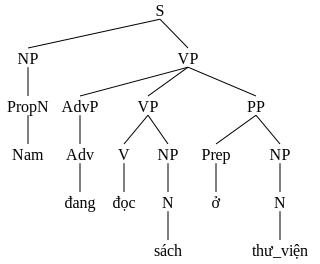

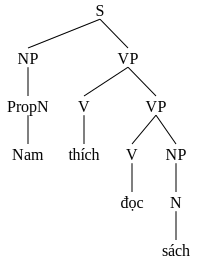

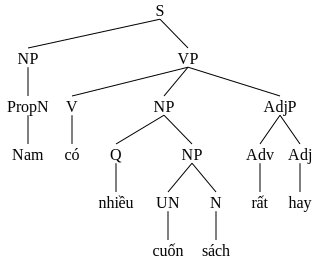

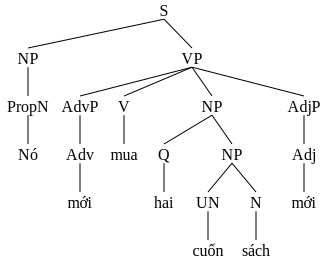

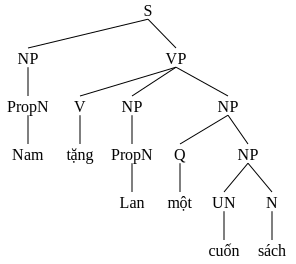

In [8]:
for tree in trees:
    display(tree)

### **4. Phân tích quá trình Parse ngữ liệu**


- Bên cạnh **RecursiveDescentParser** thì nltk còn một class là **SteppingRecursiveDescentParser**
- **SteppingRecursiveDescentParser** giúp ta quan sát cụ thể từng bước Parse ngữ liệu thành cây


In [9]:
# Khai báo như sau:
step_parser = nltk.SteppingRecursiveDescentParser(my_grammar)

Ta tiến hành khởi tạo quá trình parse bằng hàm **_initialize()_**
<br><br>
Để quan sát từng bước hoạt động ta dùng hàm **_step()_**


In [10]:
# Để thuận tiện em sẽ viết một hàm hỗ trợ việc in cây cú pháp
def printTree(parser, stop):  
    step_count = 1
    # step sẽ 
    # return giá trị True       nếu bước đó cần backtrace
    # return về một Production  nếu bước đó mở rộng cây
    # return về một Token       nếu tìm được từ phù hợp 
    display(parser.tree())
    step = parser.step()
    if stop == "Match":
        while not parser.currently_complete() and (
             isinstance(step, nltk.grammar.Production) or step is True):
            step_count += 1
            display(parser.tree())  
            step = parser.step()

    elif stop == "Match_Only":
        while not parser.currently_complete():
            step_count += 1
            step = parser.step()
            if not (isinstance(step, nltk.grammar.Production) or step is True):
                display(parser.tree())
                return step_count 

    elif stop == "Expand_Full":
        while not parser.currently_complete():
            step_count += 1
            step = parser.step()
            if isinstance(step, nltk.grammar.Production):
                display(parser.tree())

    elif stop == "Backtrace":
        while step is not True:
            step_count += 1
            display(parser.tree())
            step = parser.step()
             
    else:
        while not parser.currently_complete():
            step_count += 1
            step = parser.step()
            if not (isinstance(step, nltk.grammar.Production) or step is True):
                display(parser.tree())
    return step_count #Trả về số bước đã thực hiện qua đến khi dừng

4. 1 Xử lý ngữ liệu "Nam đang học bài ở thư viện"
<br><br>**Quan sát và đánh giá chung quá trình chuyển đổi ngữ liệu sang cây cú pháp**


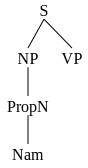

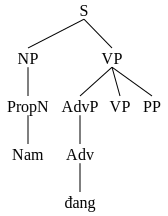

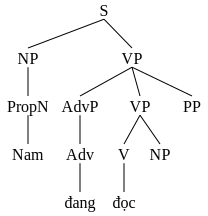

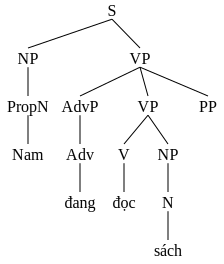

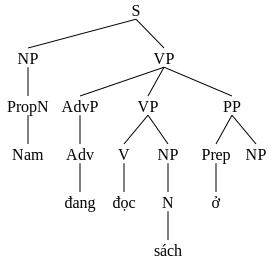

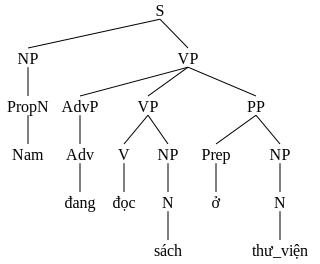

Cây hoàn chỉnh


In [11]:
# Dưới đây là trường hợp tốt nhất khi không cần phải Backtrace một lần nào
full_step = [0]*5
s = data[0].split()
step_parser.initialize(s)
printTree(parser= step_parser, stop = "Full")
print("Cây hoàn chỉnh")

* Thực tế thì không dễ dàng như vậy nên ta hãy đi vào phân tích cụ thể từng bước của quá trình này

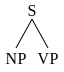

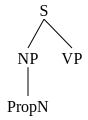

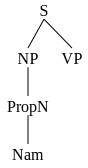

Số bước thực hiện: 4


In [12]:
step_parser.initialize(s)
n = printTree(parser= step_parser, stop= "Match")
print("Số bước thực hiện: {}".format(n))
full_step[0] += n

* Để tìm từ ***Match*** với ngữ liệu, **RecursiveDescentParser** sẽ thử tất cả các từ phù hợp với cấu trúc
* Liên tục **thử đi thử lại** các từ và cấu trúc phù hợp
* Xác định Noun Pharse đầu tiên thường là quá trình ngắn nhất **nếu không gặp phải trường hợp *Đệ quy trái***

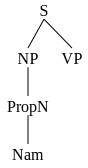

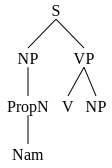

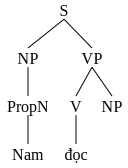

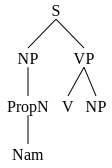

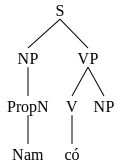

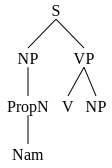

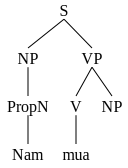

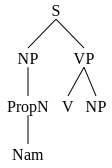

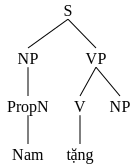

Số bước thực hiện: 9


In [13]:
# Quá trình xác định từ khớp với ngữ liệu là một vòng lẩn quẩn
# (thử - sai - backtrace) ở cả việc xác định từ lẫn xác định cấu trúc
# Ví dụ, dưới đây ta đã Backtrace (quay lui) 4 lần 
# Nhưng vẫn chưa tìm được từ nào khớp với ngữ liệu  
n = 0
for i in range(4): # Quay lui 4 lần
    n+= printTree(parser= step_parser, stop= "Backtrace")
print("Số bước thực hiện: {}".format(n))

Máy tính vẫn đang thử lần lượt các từ thuộc "V" xem có khớp với ngữ liệu hay không
* Quá trình xác định từ tiếp theo tốn thời gian hơn rất nhiều khi phải thử và backtrace rất nhiều lần
* Ngoài ra còn dễ gặp trường hợp *Dương tính giả* khi từ thì khớp nhưng cấu trúc lại sai

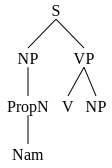

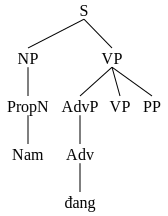

Số bước thực hiện: 68


In [14]:
# Ví dụ ở ngay từ tiếp theo, từ 'đang'
# Em sẽ tạm bỏ qua quá trình thử các từ và cấu trúc để cho ra đáp số cuối cùng
n+= printTree(parser= step_parser, stop= "Match_Only")
print("Số bước thực hiện: {}".format(n))
full_step[0] += n

Cuối cùng, máy tính xác định từ 'đang' thuộc từ loại "Adv" sẽ phù hợp với ngữ liệu
* Như ta thấy, số bước cần để xác định đúng từ và cấu trúc cho từ thứ 2 đã tăng lên 68
<br>Con số này **gấp 17 lần** số bước cần để  xác định cấu trúc cho từ đầu tiên<br><br>
* Và hiển nhiên việc xác định cây cú pháp của cả đoạn văn còn **tốn công sức hơn rất nhiều**

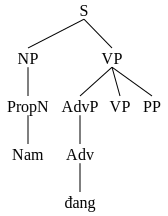

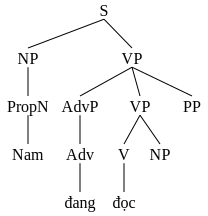

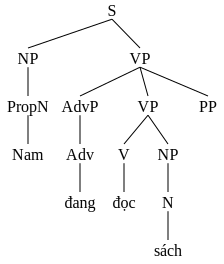

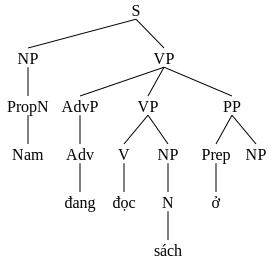

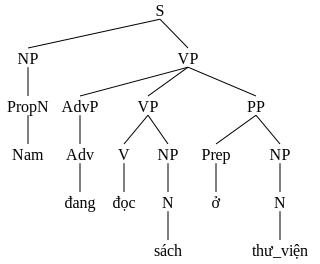

In [15]:
# Máy tính sẽ lặp đi lặp lại việc: thử - sai -> backtrace
# Cho cả từ lẫn cấu trúc ngữ pháp cho đến khi cho ra cây ngữ pháp hoàn chỉnh
n = 0
# Dưới đây là ví dụ về việc thử các cấu trúc ngữ pháp khác nhau
full_step[0] += printTree(parser= step_parser, stop="Expand Full")

In [16]:
print("Tổng số bước để hoàn thiện cây cú pháp: {}".format(full_step[0]))

Tổng số bước để hoàn thiện cây cú pháp: 102


* Có thể thấy Tổng số bước để hoàn thiện cây cú pháp là 102
<br>Tức việc tìm kiếm từ 'đang' tiêu tốn thời gian hơn tất thảy các từ còn lại

4. 2. Xử lý ngữ liệu "Nam thích đọc sách"
<br><br>**Quan sát và đánh giá từng bước chọn từ**

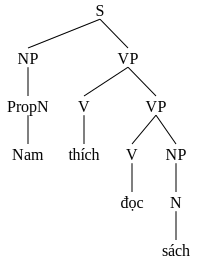

In [17]:
# Tái đặt và nạp lại Parser
s = data[1].split()
step_parser.initialize(s)
# In cây ngữ pháp hoàn chỉnh mà ta đã vẽ được 
for tree in my_parser.parse(s):
    display(tree)

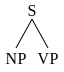

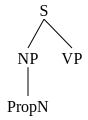

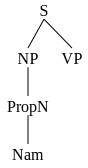

Số bước để xác định chủ ngữ 'Nam': 4


In [18]:
# Vì ở đoạn ngữ liệu trước, ta đã đếm được với chủ ngữ là 'Nam'
# Thì sẽ tốn 4 bước để xác định
# Cho nên có thể suy ra tương tự ở đoạn ngữ liệu này
# vì cả 2 đều có chủ ngữ là 'Nam'
n = printTree(parser= step_parser, stop= "Match")
print("Số bước để xác định chủ ngữ 'Nam': {}".format(n))
full_step[1] += n

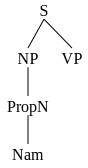

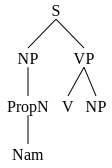

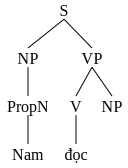

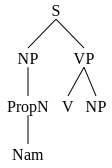

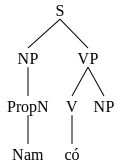

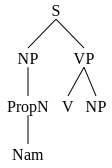

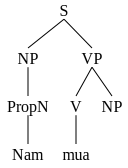

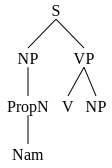

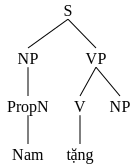

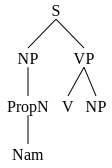

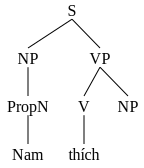

Số bước để xác định tính từ 'thích': 11


In [19]:
n = printTree(parser= step_parser, stop= "Match")
print("Số bước để xác định tính từ 'thích': {}".format(n))

* Đây là một ví dụ cho trường hợp *Dương tính giả* em vừa đề cập ở trên
<br>*Ta có thể thấy cấu trúc ngữ pháp của câu vẫn chưa chính xác*
<br>*--> Để tìm được kết quả chính xác thì chương trình sẽ phải Backtrace lại ít nhất 1 lần nữa để tìm đúng cấu trúc*

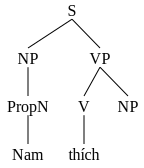

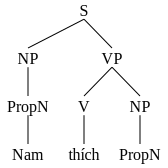

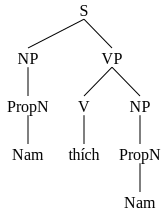

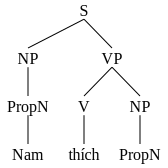

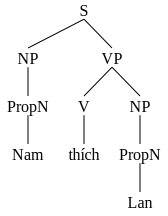

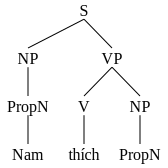

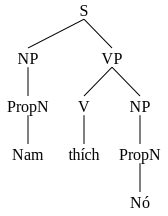

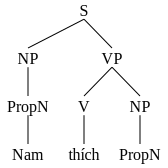

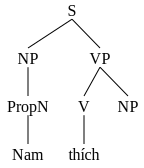

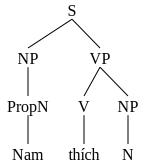

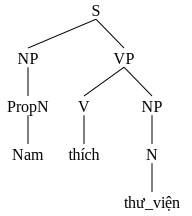

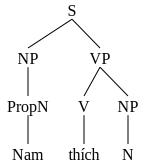

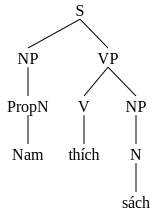

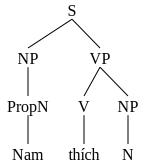

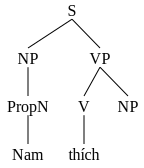

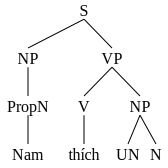

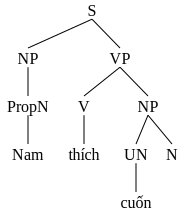

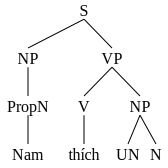

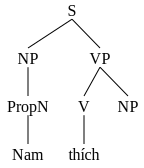

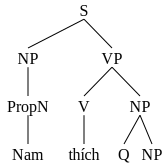

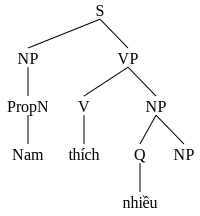

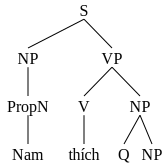

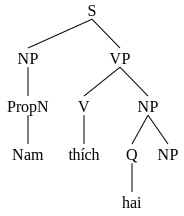

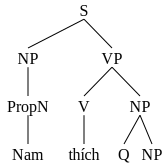

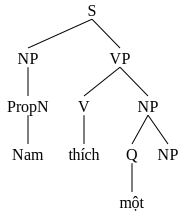

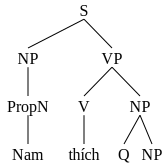

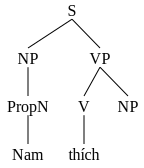

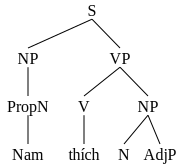

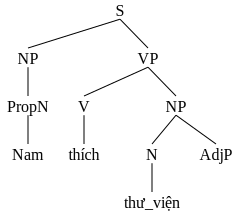

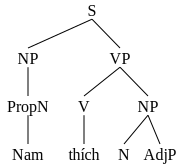

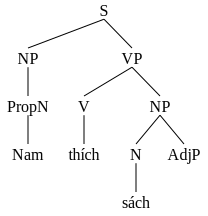

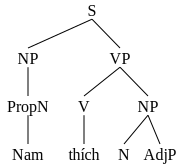

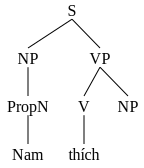

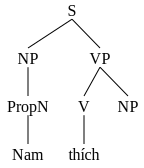

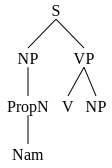

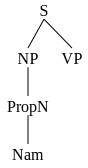

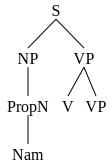

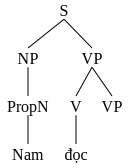

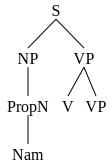

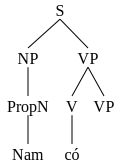

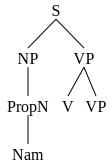

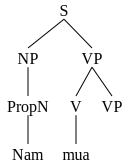

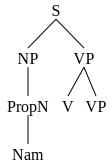

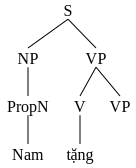

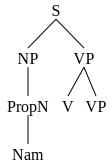

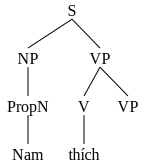

Số bước thực tế để xác định tính từ 'thích': 57


In [20]:
n += printTree(parser= step_parser, stop= "Match")
print("Số bước thực tế để xác định tính từ 'thích': {}".format(n))
full_step[1] += n

* Vậy ta có thể suy ra, việc bắt phải *Dương tính giả* là nguyên nhân lãng phí nhiều tài nguyên nhất
<br> trong quá trình parse ngữ liệu
* Quan sát tiếp quá trình parse ta có thể có được thêm một số nhận định

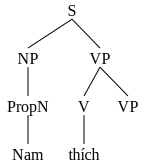

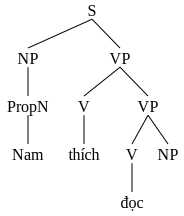

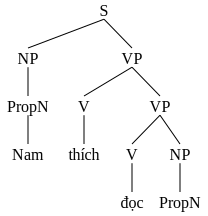

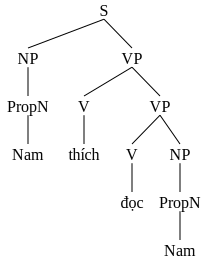

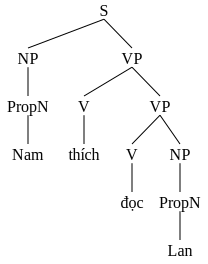

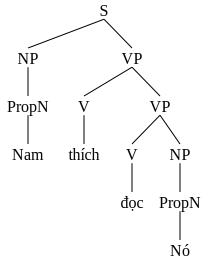

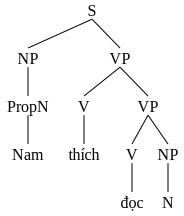

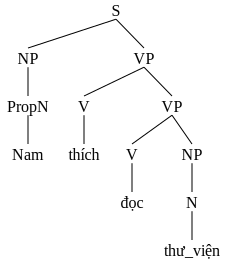

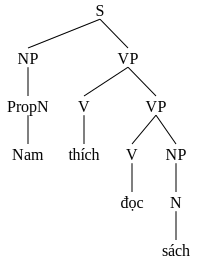

Tổng số bước để hoàn thành cây ngữ pháp: [102, 77, 0, 0, 0]


In [21]:
# Dưới đây là quá trình có lược bớt của Các bước
# Để xác định những lá tiếp theo của cây ngữ pháp
full_step[1] += printTree(parser= step_parser, stop="Expand_Full")
print("Tổng số bước để hoàn thành cây ngữ pháp: {}".format(full_step))

* Có thể thấy số bước còn lại cần để xác định cây ngữ pháp đã ít hơn đáng kể
<br> nếu ta so với số bước để xác định lá thuộc Verb Phase ở tầng thứ nhất
* Phải chăng Verb Phase càng gần rễ thì càng tốn nhiều bước để xác định?
<br><br>
*Để kiểm tra giả thuyết này ta sẽ đến với các ngữ liệu còn lại*

4. 3. Xử lý ngữ liệu 'Nam có nhiều cuốn sách rất hay'
<br> **Kiểm tra giả thuyết**

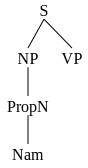

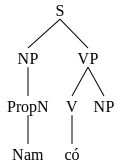

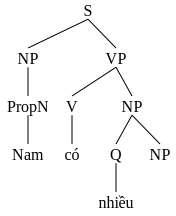

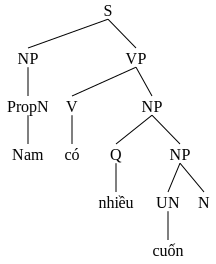

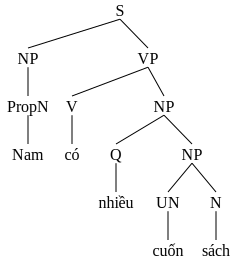

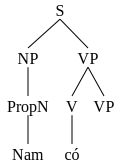

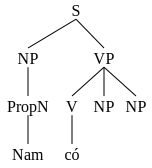

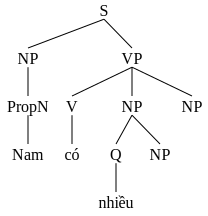

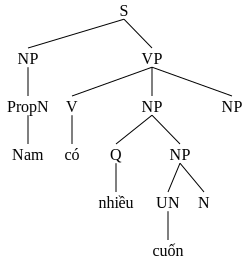

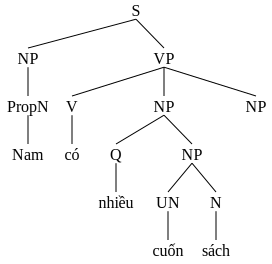

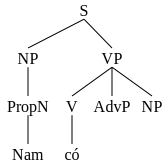

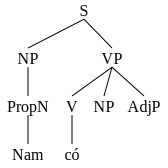

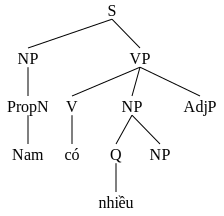

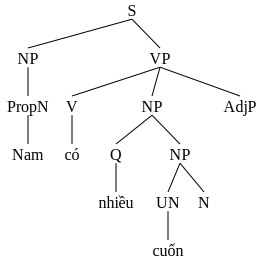

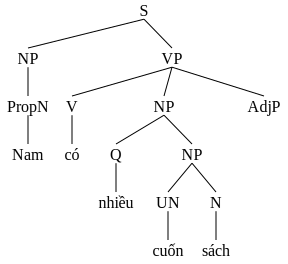

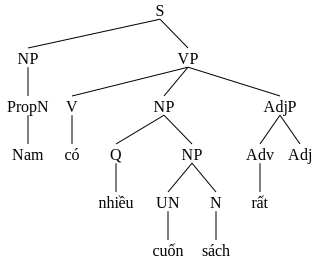

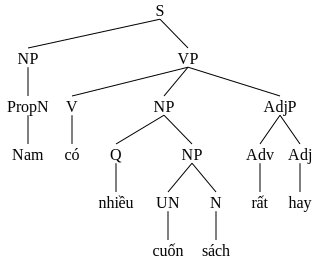

Tốn 386 bước


In [22]:
# Theo như giả thiết trên, lá ở vị trí thứ 2 có số bước tìm là lớn nhất
s = data[2].split()
step_parser.initialize(s)
# Em sẽ in quá trình 
full_step[2] += printTree(parser= step_parser, stop= "Full")
print("Tốn {} bước".format(full_step[2]))

* Quả nhiên việc xác định đúng VP ở gần gốc(S) nhất có vai trò đặc biệt quan trọng
<br>Vì nếu VP ngay trên gốc bị thay đổi, Cây cú pháp gần như bắt đầu lại từ đầu
<br><br>Ở đoạn ngữ liệu trên, máy tính đã phải thử 4 cấu trúc VP khác nhau trước khi có được cấu trúc chính xác nhất
<br><br>**Các cấu trúc đã thử:**
* <p style="color:red;">VP  -> V NP</p>
* <p style="color:red;">VP  -> V VP</p>   
* <p style="color:red;">VP  -> V NP NP</p>   
* <p style="color:red;">VP  -> V AdvP NP</p>   
* <p style="color:green;">VP  -> V NP AdjP</p>      
Tất nhiên ta có thể nói số lượng từ trong câu cũng ảnh hưởng đến độ phức tạp khi phân tích ngữ liệu
<br> nhưng them em thì nó không quan trọng bằng cấu trúc ngữ pháp mà ta nạp trong CFG
<br><br>*Để chứng minh luận điểm này em xin phép sử dụng câu ngữ liệu tiếp theo*

4. 4. Xử lý ngữ liệu 'Nó mới mua hai cuốn sách mới'
<br>**Chứng minh sự quan trọng bậc nhất của cấu trúc ngữ pháp**

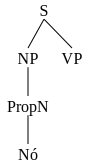

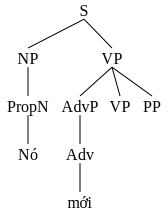

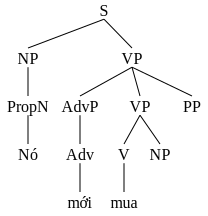

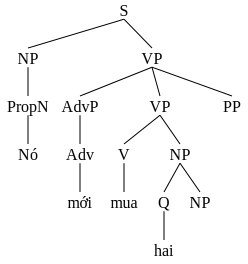

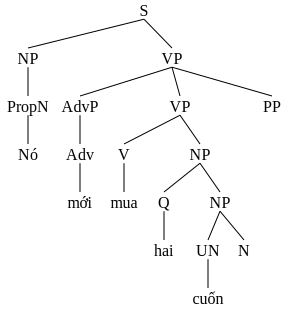

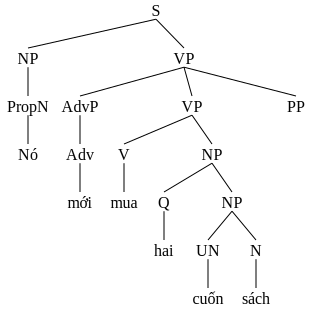

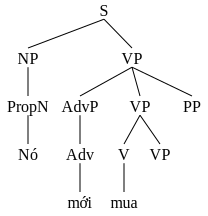

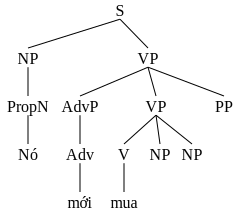

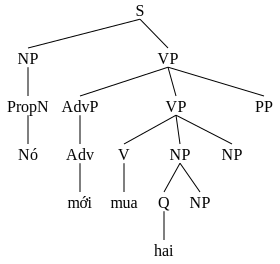

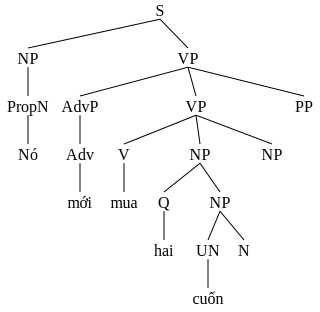

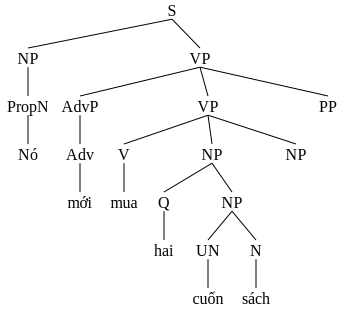

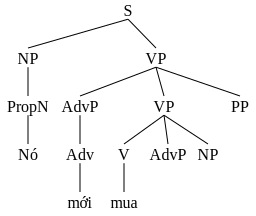

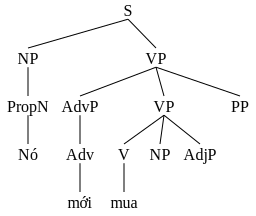

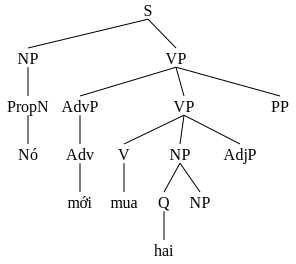

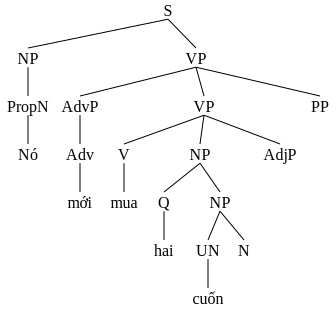

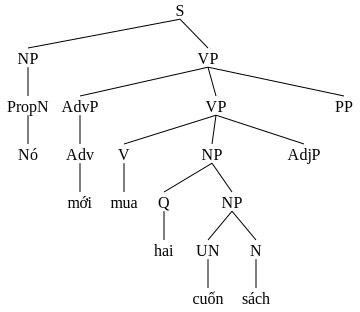

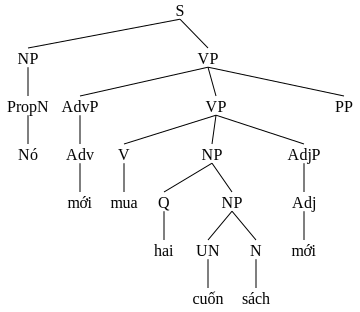

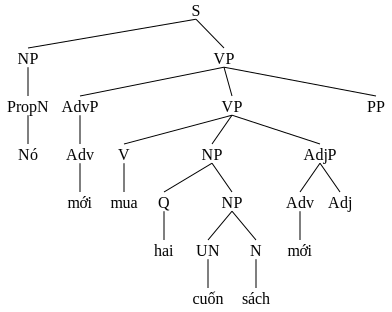

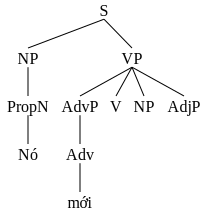

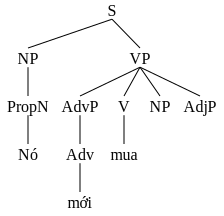

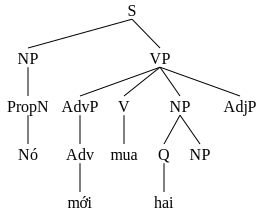

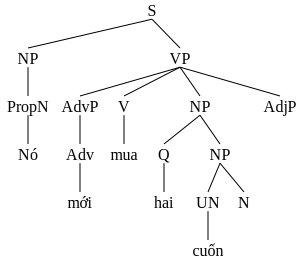

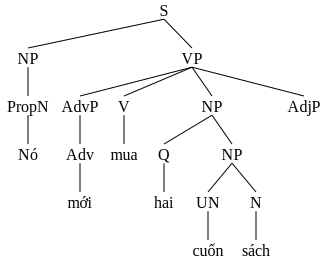

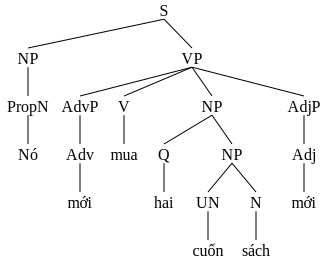

Tốn 603 bước


In [23]:
# Theo như giả thiết trên, lá ở vị trí thứ 2 có số bước tìm là lớn nhất
s = data[3].split()
step_parser.initialize(s)
# Em sẽ in quá trình 
full_step[3] += printTree(parser= step_parser, stop= "Full")
print("Tốn {} bước".format(full_step[3]))

* Như ta đã thấy, dù có cùng số lượng từ (7)
<br>Nhưng câu ngữ liệu số 4 tiêu tốn hơn gấp rưỡi số bước parse so với ngữ liệu 3
* Điều này là do thử sai cấu trúc dẫn đến backtrace quá nhiều lần
<br><br>*--> Thứ tự sắp xếp các quy tắc trong CFG cũng sẽ ảnh hưởng. Vì thuật toán Top-down sẽ
<br>  thử lần lượt các quy tắc từ trên xuống và từ trái qua*

4. 5. Xử lý ngữ liệu 'Nam tặng Lan một cuốn sách'
<br>**Chứng minh tác động của thứ tự sắp xếp các quy tắc**

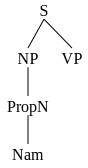

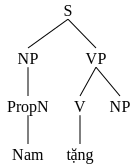

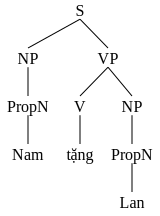

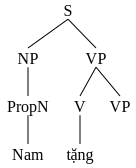

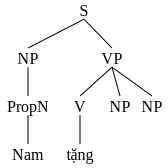

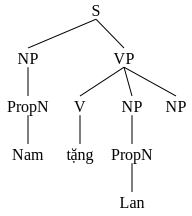

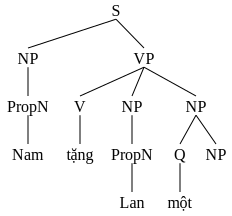

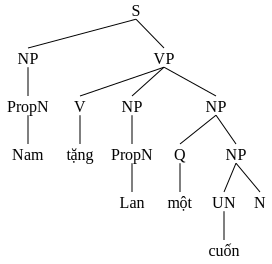

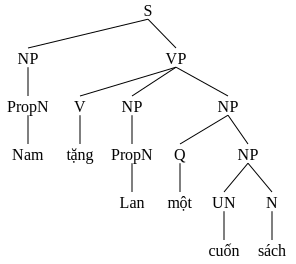

Tốn 206 bước


In [24]:
# Dưới đây là quá trình đã rút gọn(loại bỏ các bước backtrace khi kiểm tra từ)
# Để xây dựng Syntatic Analysis Tree cho đoạn ngữ liệu trên
s = data[4].split()
step_parser.initialize(s)
# Em sẽ in quá trình 
full_step[4] += printTree(parser= step_parser, stop= "Full")
print("Tốn {} bước".format(full_step[4]))

* Khi ta thay đổi thứ tự các quy tắc trong CFG số bước cần để parse ngữ liệu sẽ thay đổi
<br>Cụ thể là đưa quy tắc **VP  -> V NP NP** lên trên sẽ làm giảm số bước cần để parse câu 

In [25]:
# Tạo một CFG mới với điểm khác 
# Là quy tắc VP  -> V NP NP được đẩy lên trên
new_grammar = nltk.CFG.fromstring("""
S   -> NP VP

NP  -> PropN
NP  -> N
NP  -> UN N
NP  -> Q NP
NP  -> N AdjP

VP  -> V NP NP
VP  -> V NP
VP  -> V VP
VP  -> V AdvP NP
VP  -> V NP AdjP
VP  -> AdvP VP PP
VP  -> AdvP V NP AdjP

PP  -> Prep NP

AdvP -> Adv

AdjP -> Adj
AdjP -> Adv Adj

PropN   -> 'Nam' | 'Lan' | 'Nó'
N       -> 'thư_viện' | 'sách'
V       -> 'đọc' | 'có' | 'mua' | 'tặng' | 'thích'
Adv     -> 'rất' | 'mới' | 'đang'
Adj     -> 'hay' | 'mới' 
Q       -> 'nhiều' | 'hai' | 'một'
UN      -> 'cuốn'
Prep    -> 'ở'
""")

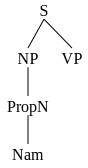

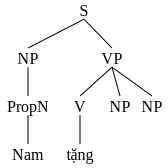

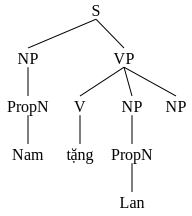

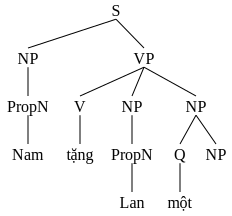

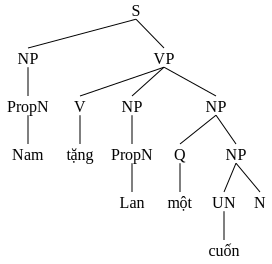

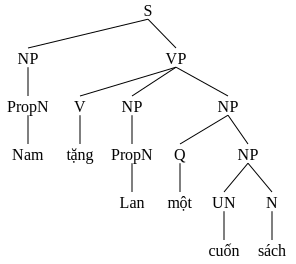

Tốn 64 bước


In [26]:
# Tạo một parser mới cho nó đọc new_cfg
new_parser = nltk.SteppingRecursiveDescentParser(new_grammar)
# Tiến hành parse và quan sát kết quả
s = data[4].split()
new_parser.initialize(s)
# Em sẽ in quá trình 
print("Tốn {} bước".format(printTree(parser= new_parser, stop= "Full")))

**Như ta thấy, số bước parse đoạn văn trên đã giảm chỉ còn khoảng 31% so với ban đầu**
<br><br>*-->Chứng tỏ Trong một tập ngữ liệu nhỏ:*
<br>*Việc sắp xếp thứ tự các quy tắc hợp lý sẽ tối ưu hóa tốc độ parse ngữ liệu*

### **5. Tổng kết**

**5. 1.Qua tập ngữ liệu được cho** 
<br><br>*Em đã rút ra một số nhận định về thuật toán **Recursive Descent Parse (Top-down):***
* Kiểm tra khớp (Match) và quay lui (Backtrace) là nòng cốt của thuật toán
* Verb Pharse đóng vai trò vô cùng quan trọng trong quá trình parse
* Thứ tự sắp xếp các quy tắc trong CFG sẽ ảnh hưởng lớn đến tốc độ parse ra 1 cây cú pháp trong tập ngữ liệu nhỏ

*Bên cạnh đó, thuật toán này còn một đặc điểm nữa mà em chưa trình bày được trong tập ngữ liệu trên*
<br><br>Đó là việc nó thể **dựng nên nhiều cây cú pháp trên 1 ngữ liệu** nhờ việc thử toàn bộ các quy tắc
<br>Theo như em tìm hiểu, đây chính là một điểm vượt trội của thuật toán Top-down so với Bottom-up

**5. 2.Văn phạm CFG đã xây dựng**
<br><br> Em đã xây dựng văn phạm CFG **(my_grammar)** để xây dựng parser cho tập ngữ liệu **data** với kết quả như như sau:

________________________________________

Ngữ liệu:  Nam đang đọc sách ở thư_viện


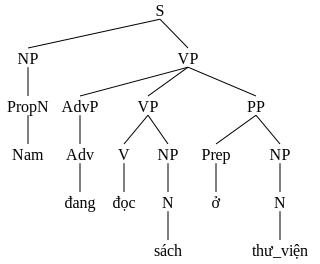

Số bước :  102
________________________________________

Ngữ liệu:  Nam thích đọc sách


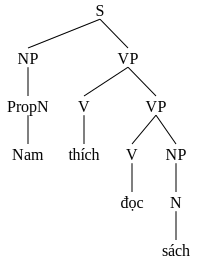

Số bước :  77
________________________________________

Ngữ liệu:  Nam có nhiều cuốn sách rất hay


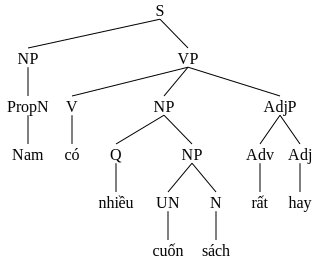

Số bước :  386
________________________________________

Ngữ liệu:  Nó mới mua hai cuốn sách mới


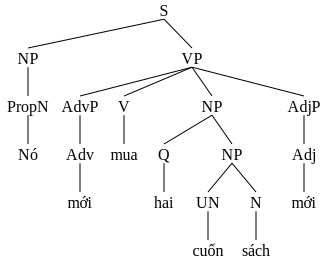

Số bước :  603
________________________________________

Ngữ liệu:  Nam tặng Lan một cuốn sách


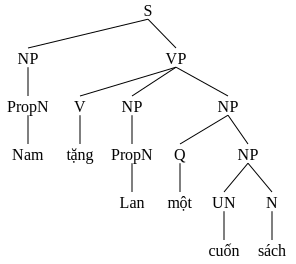

Số bước :  206


In [27]:
for stepNum, tree, scentence  in zip(full_step, trees, data):
    print("________________________________________")
    print("\nNgữ liệu: ", scentence)
    display(tree)
    print("Số bước : ", stepNum)

Link source Code: **https://github.com/DuyAccel/NLP_SGU/blob/main/CFG_Practice.ipynb**